Task 3: Creating a decision tree classifier and visualizing it graphically. The new data fed to classifier will predict the right class accordingly.

In [3]:
#Importing packagaes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [4]:
#Loading the iris dataset
iris_data = datasets.load_iris()

In [5]:
#Creating the iris dataframe
iris_df = pd.DataFrame(iris_data.data,columns = iris_data.feature_names)

In [6]:
#Displaying the first five rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#Creating target variable
y = iris_data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Setting up the decision tree

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(iris_df, y, test_size=0.3, random_state=3)

Modeling

In [10]:
from sklearn.tree import DecisionTreeClassifier
iristree = DecisionTreeClassifier(criterion="entropy", max_depth=4) #instance of DecisionTreeClassifier
iristree #displays default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
#Fitting the data with the training feature matrix X_trainset and training response vector y_trainset
iristree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
predtree = iristree.predict(X_testset)

In [13]:
predtree[0:5]
y_testset[0:5]

array([0, 0, 0, 0, 0])

In [14]:
#Evaluating the accuracy of the decision tree
from sklearn import metrics
print("DecisionTrees's Accuracy:", metrics.accuracy_score(y_testset,predtree))

DecisionTrees's Accuracy: 0.9777777777777777


Visualization

In [15]:
!pip install pydotplus
!apt-get install graphviz -y

     |████████████████████████████████| 278 kB 3.4 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=77385cc1d907b425006796a580ec254dd800ad79622a0e25dcf653da84e3a39e
  Stored in directory: /home/jovyan/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [16]:
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.42.3            |       h0511662_0         6.9 MB  conda-forge
    libtool-2.4.6              |    h14c3975_1002         512 KB  conda-forge
    python-graphviz-0.14.1     |     pyh9f0ad1d_0          19 KB  conda-forge
    xorg-libxpm-3.5.13         |       h516909a_0          63 KB  conda-forge
    xorg-libxt-1.1.5           |    h516909a_1003         367 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.9 MB

The following NEW pa

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
import pydotplus
%matplotlib inline

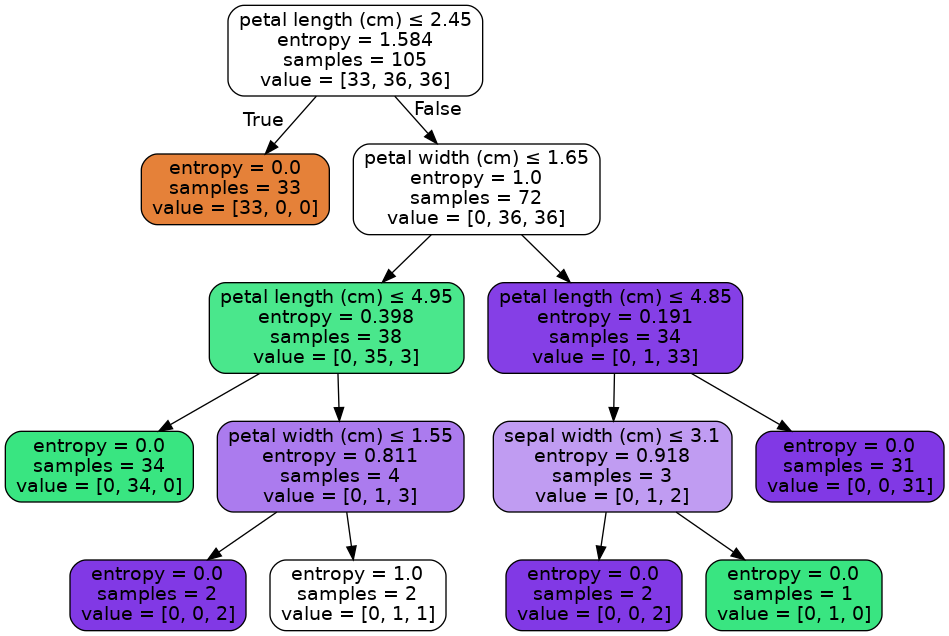

In [19]:
dot_data = StringIO()
export_graphviz(iristree, out_file=dot_data, feature_names=iris_data.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())